<a href="https://colab.research.google.com/github/TKph/colab/blob/main/%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E3%83%95%E3%82%A9%E3%83%AC%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# データの読み込み

---



In [2]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=41)



---
# ランダムフォレストを適用


---



In [5]:
forest = RandomForestClassifier(n_estimators = 7, max_features = 3, max_depth = 3, criterion = 'gini', random_state = 41) #n_estimatorsは決定木の数, max_featuresは1つの木が使える特徴量の数
forest.fit(X_train, y_train)

print(f'Train Accuracy: {forest.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {forest.score(X_test, y_test):.3f}')

Train Accuracy: 0.992
Test Accuracy: 0.978


<ipython-input-8-39f9d1da083e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


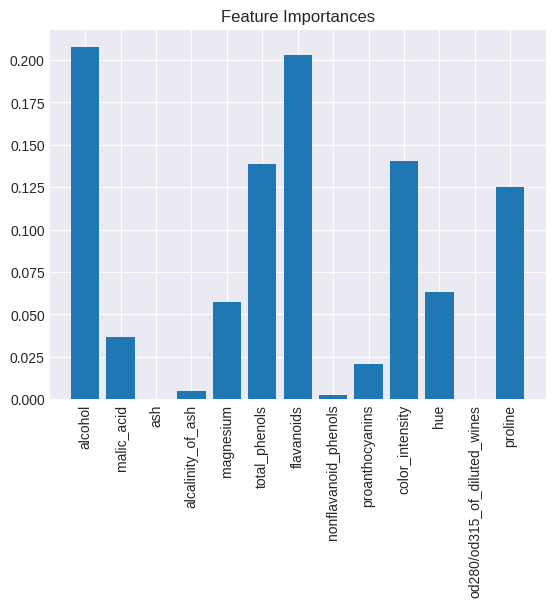

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

n_features = wine.data.shape[1]
plt.title('Feature Importances')
plt.bar(range(n_features), forest.feature_importances_, align = 'center')
plt.xticks(range(n_features), wine.feature_names, rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.show()



---
# 解説


---



ランダムフォレストのように複数の学習モデルを組み合わせたモデルをアンサンブルモデルと呼ぶ. 決定木では過学習に陥りやすいが, 2つのランダム性を用いてそれを回避しやすくしている. 1つめはデータのランダム性で, 元データから復元抽出をして決定木ごとに異なったデータを使う. このようなデータの分け方によってできた標本をブートストラップ標本と呼ぶ. 2つ目はノード分割時に使う特徴量のランダム性であり, 決定木のように情報利得を最大にする特徴量を選ぶのではなく, 全特徴量の中から今回は最大3つだけランダムに選んで, その中で情報利得を最大化する. この時の特徴量の選び方は非復元抽出である. そうして作られた1つ1つの決定木は精度は低いが(弱識別器), その多数決をとればとても高い識別能力を持つ. 多数決の取り方は加重平均(期待値)である. 詳しくはscikit-learnの説明を読むこと.

注意点として2つ挙げる. まず, 特徴量の中に多重共線性がないことである. 多重共線性とは特徴量同士の相関係数が0.95以上(目安)の組みがあること. 実質同じ特徴量を2回使えることになるので, 本当に重要な特徴量を見逃す可能性が上がる. 2つ目に過学習について. 過学習の定義は決まっていないが, 訓練データと検証データの正解率の差が一番小さくするmax_depthを探すのが良いだろう. 